<a href="https://colab.research.google.com/github/chechelan/0-chechelan/blob/main/Week1_3Step_app_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Inroduction
- About notebook:This is week1 to week3 assignments, the goal is to Learn how to clean data and to investigate distributions
- Dataset: data comes from activity trackers, for a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

### Data cleaning

In [ ]:
# initiate google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.
import math
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# Read in and merge the two data sets (tip: think of different CSV formats that exist)
df1 = pd.read_csv('gdrive/My Drive/steps.csv', sep=";")
df2 = pd.read_csv('gdrive/My Drive/survey.csv')

In [ ]:
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [ ]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to weight
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


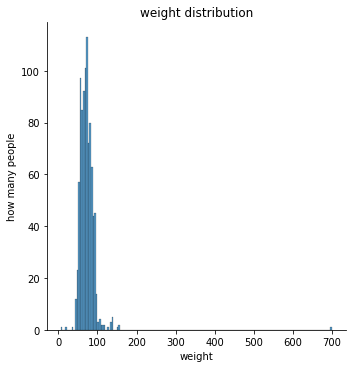

In [ ]:
# Clean the data: remove impossible values

sns.displot(df['weight'].dropna(), kde=False)
plt.title('weight distribution')
plt.xlabel('weight')
plt.ylabel('how many people')
plt.show()

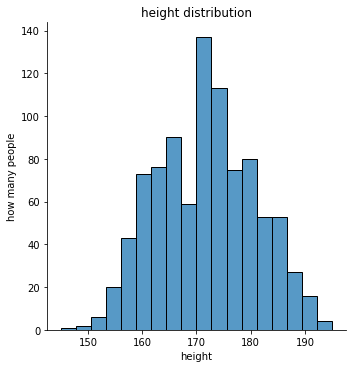

In [ ]:
sns.displot(df['height'].dropna(), kde=False)
plt.title('height distribution')
plt.xlabel('height')
plt.ylabel('how many people')
plt.show()

In [ ]:
df = df.drop(df[(df["weight"] < 20) | (df["weight"] > 155)].index)

In [ ]:
df.head(3)

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0


In [ ]:
# Create the variable mean steps per participant.
# Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure.
df["mean_steps"] = df.iloc[:, 10:].mean(axis=1)

<ipython-input-12-f27b5024b85d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["mean_steps"] = df.iloc[:, 10:].mean(axis=1)


In [ ]:
# Show the head() of the resulting data frame
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,9946.170732
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5523.712500
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8147.687500
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3038.500000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,4949.827586


###Feature engineering
- The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone.

### Exploratory data analysis

In [ ]:
# An analysis of mean steps per participant:
# Summary statistics (measure of central tendency and variation, e.g., mean, median, standard deviation)
# Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
# The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
# Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
# Describe and interpret the results

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


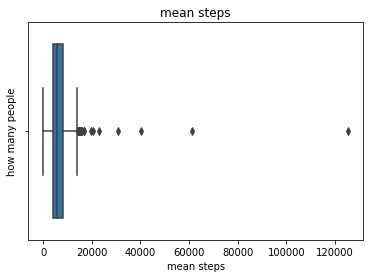

In [ ]:
# Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
sns.boxplot(df['mean_steps'].dropna())
plt.title('mean steps')
plt.xlabel('mean steps')
plt.ylabel('how many people')
plt.show()

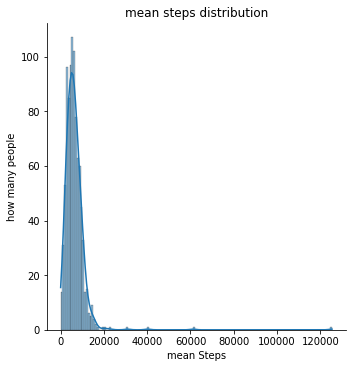

In [ ]:
sns.displot(df['mean_steps'].dropna(), kde=True)
plt.title('mean steps distribution')
plt.xlabel('mean Steps')
plt.ylabel('how many people')
plt.show()

In [ ]:
df["mean_steps"].describe()

count       927.000000
mean       6345.115493
std        5502.184951
min          48.800000
25%        3844.390587
50%        5798.137931
75%        7930.830205
max      125350.375000
Name: mean_steps, dtype: float64

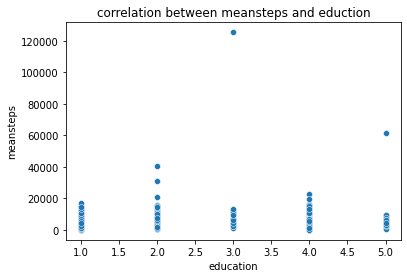

In [ ]:
# Make a scatterplot matrix of the numerical variables
sns.scatterplot(x='education', y='mean_steps', data=df)
plt.xlabel('education')
plt.ylabel('meansteps')
plt.title('correlation between meansteps and eduction')
plt.show()


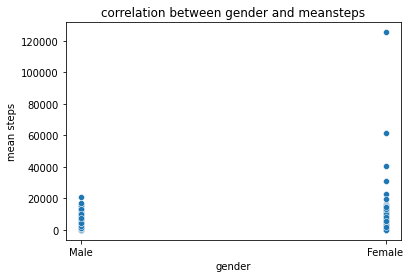

In [ ]:
sns.scatterplot(x='gender', y='mean_steps', data=df)
plt.xlabel('gender')
plt.ylabel('mean steps')
plt.title('correlation between gender and meansteps')
plt.show()


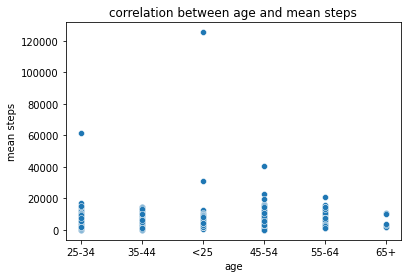

In [ ]:
sns.scatterplot(x='age', y='mean_steps', data=df)
plt.xlabel('age')
plt.ylabel('mean steps')
plt.title('correlation between age and mean steps')
plt.show()

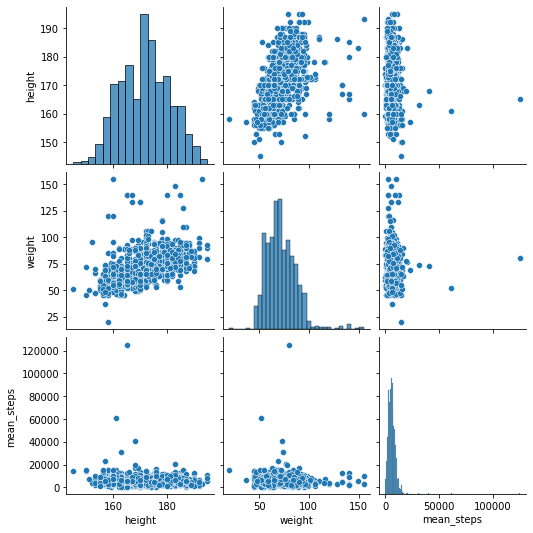

In [ ]:
# Make a correlation matrix of the numerical variables
sns.pairplot(df[['height', 'weight', 'mean_steps']])
plt.show()

            height  weight  mean_steps
height        1.00    0.51       -0.07
weight        0.51    1.00       -0.04
mean_steps   -0.07   -0.04        1.00


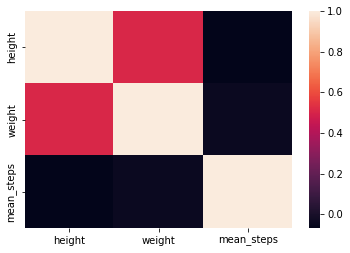

In [ ]:
corr = df[['height', 'weight', 'mean_steps']].corr()
corr = round(corr,2)
print(corr.head())

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [ ]:
# Describe and interpret the results

### Predictive model

In [ ]:
# Explain linear regression in your own words


In [ ]:
# Create dummy variables for the categorical variables
dummy_gender = pd.get_dummies(df["gender"])
dummy_age = pd.get_dummies(df["age"])
df = pd.concat([df, dummy_gender["Female"], dummy_age], axis=1)

In [ ]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,height,weight,mean_steps,Female,25-34,35-44,45-54,55-64,65+,<25
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,178.0,98.0,9946.170732,0,1,0,0,0,0,0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,180.0,77.0,5523.712500,0,0,1,0,0,0,0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,180.0,83.0,8147.687500,0,1,0,0,0,0,0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,178.0,80.0,3038.500000,0,0,0,0,0,0,1
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,167.0,61.0,4949.827586,1,1,0,0,0,0,0


In [ ]:
df = df[df['mean_steps'].notna()]

In [ ]:
# Fit a linear regression model to predict the mean steps per participant, using the training data.
##You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).
y = df['mean_steps']
X = df.iloc[:, -8:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head() #The train data

lm = LinearRegression() #creates a new LR model
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_test_p = lm.predict(X_test)

###evaluation

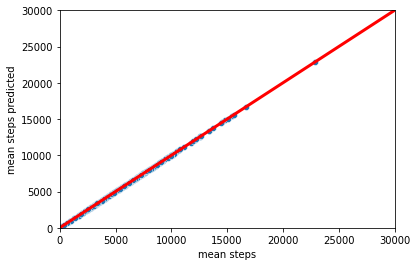

In [ ]:
#Evaluate the model on the test data
sns.scatterplot(x=y_test,y=y_test_p)
plt.xlim(0, 30000)
plt.ylim(0, 30000)
plt.plot([0, 30000], [0, 30000], color='red', lw=3)
plt.xlabel('mean steps')
plt.ylabel('mean steps predicted')
plt.show()

In [ ]:
###Predictive power of the model (R2, RMSE)
r2_score(y_test, y_test_p)

1.0

In [ ]:
#Describe and interpret the results
math.sqrt(mean_squared_error(y_test, y_test_p))

1.2744808733471877e-12

In [ ]:
lm.intercept_

-1.8189894035458565e-12

In [ ]:
lm.coef_

array([ 1.00000000e+00, -3.31541314e-14, -2.73284800e-14, -2.10434772e-15,
       -4.24696893e-14, -5.04891762e-14,  1.27865945e-13, -5.47425165e-15])

###conclusion
The model explaines 100% of total variance in mean steps, it seems the model is overfitting in some way, while i runned it several times, the previous results were quite different ???